# Regression

### Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [2]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

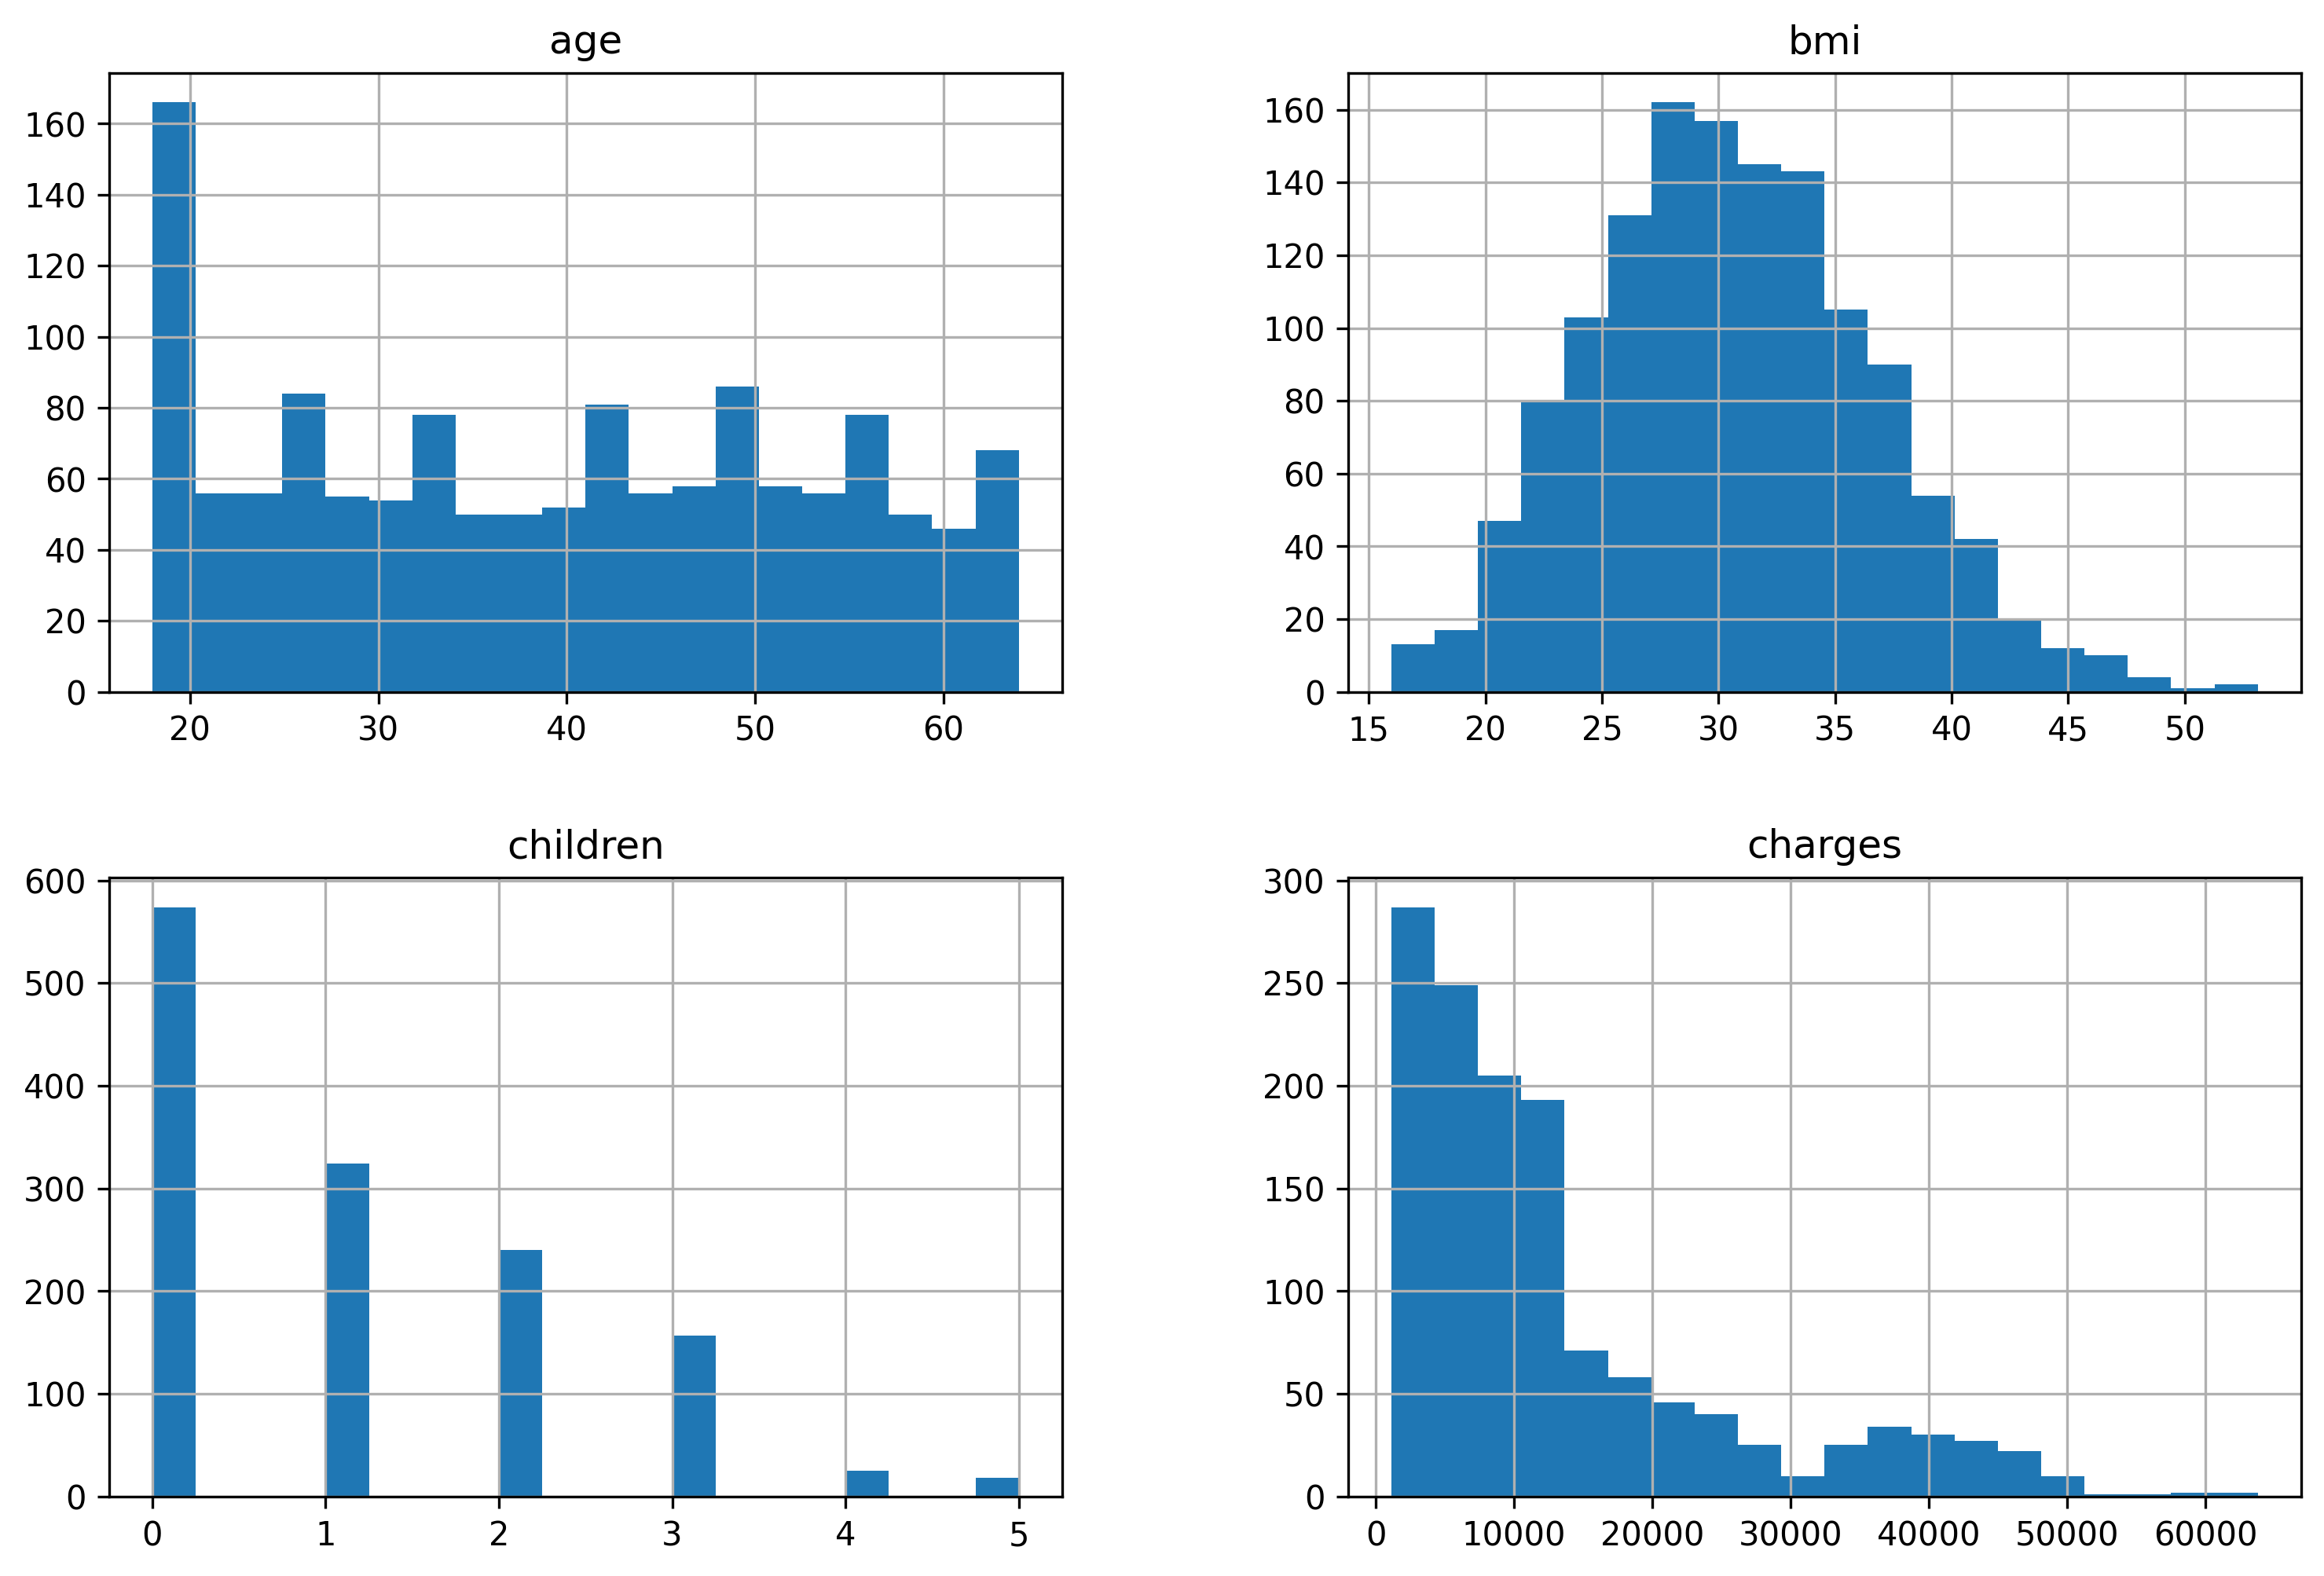

In [4]:
numeric = ['age', 'bmi', 'children', 'charges']

data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

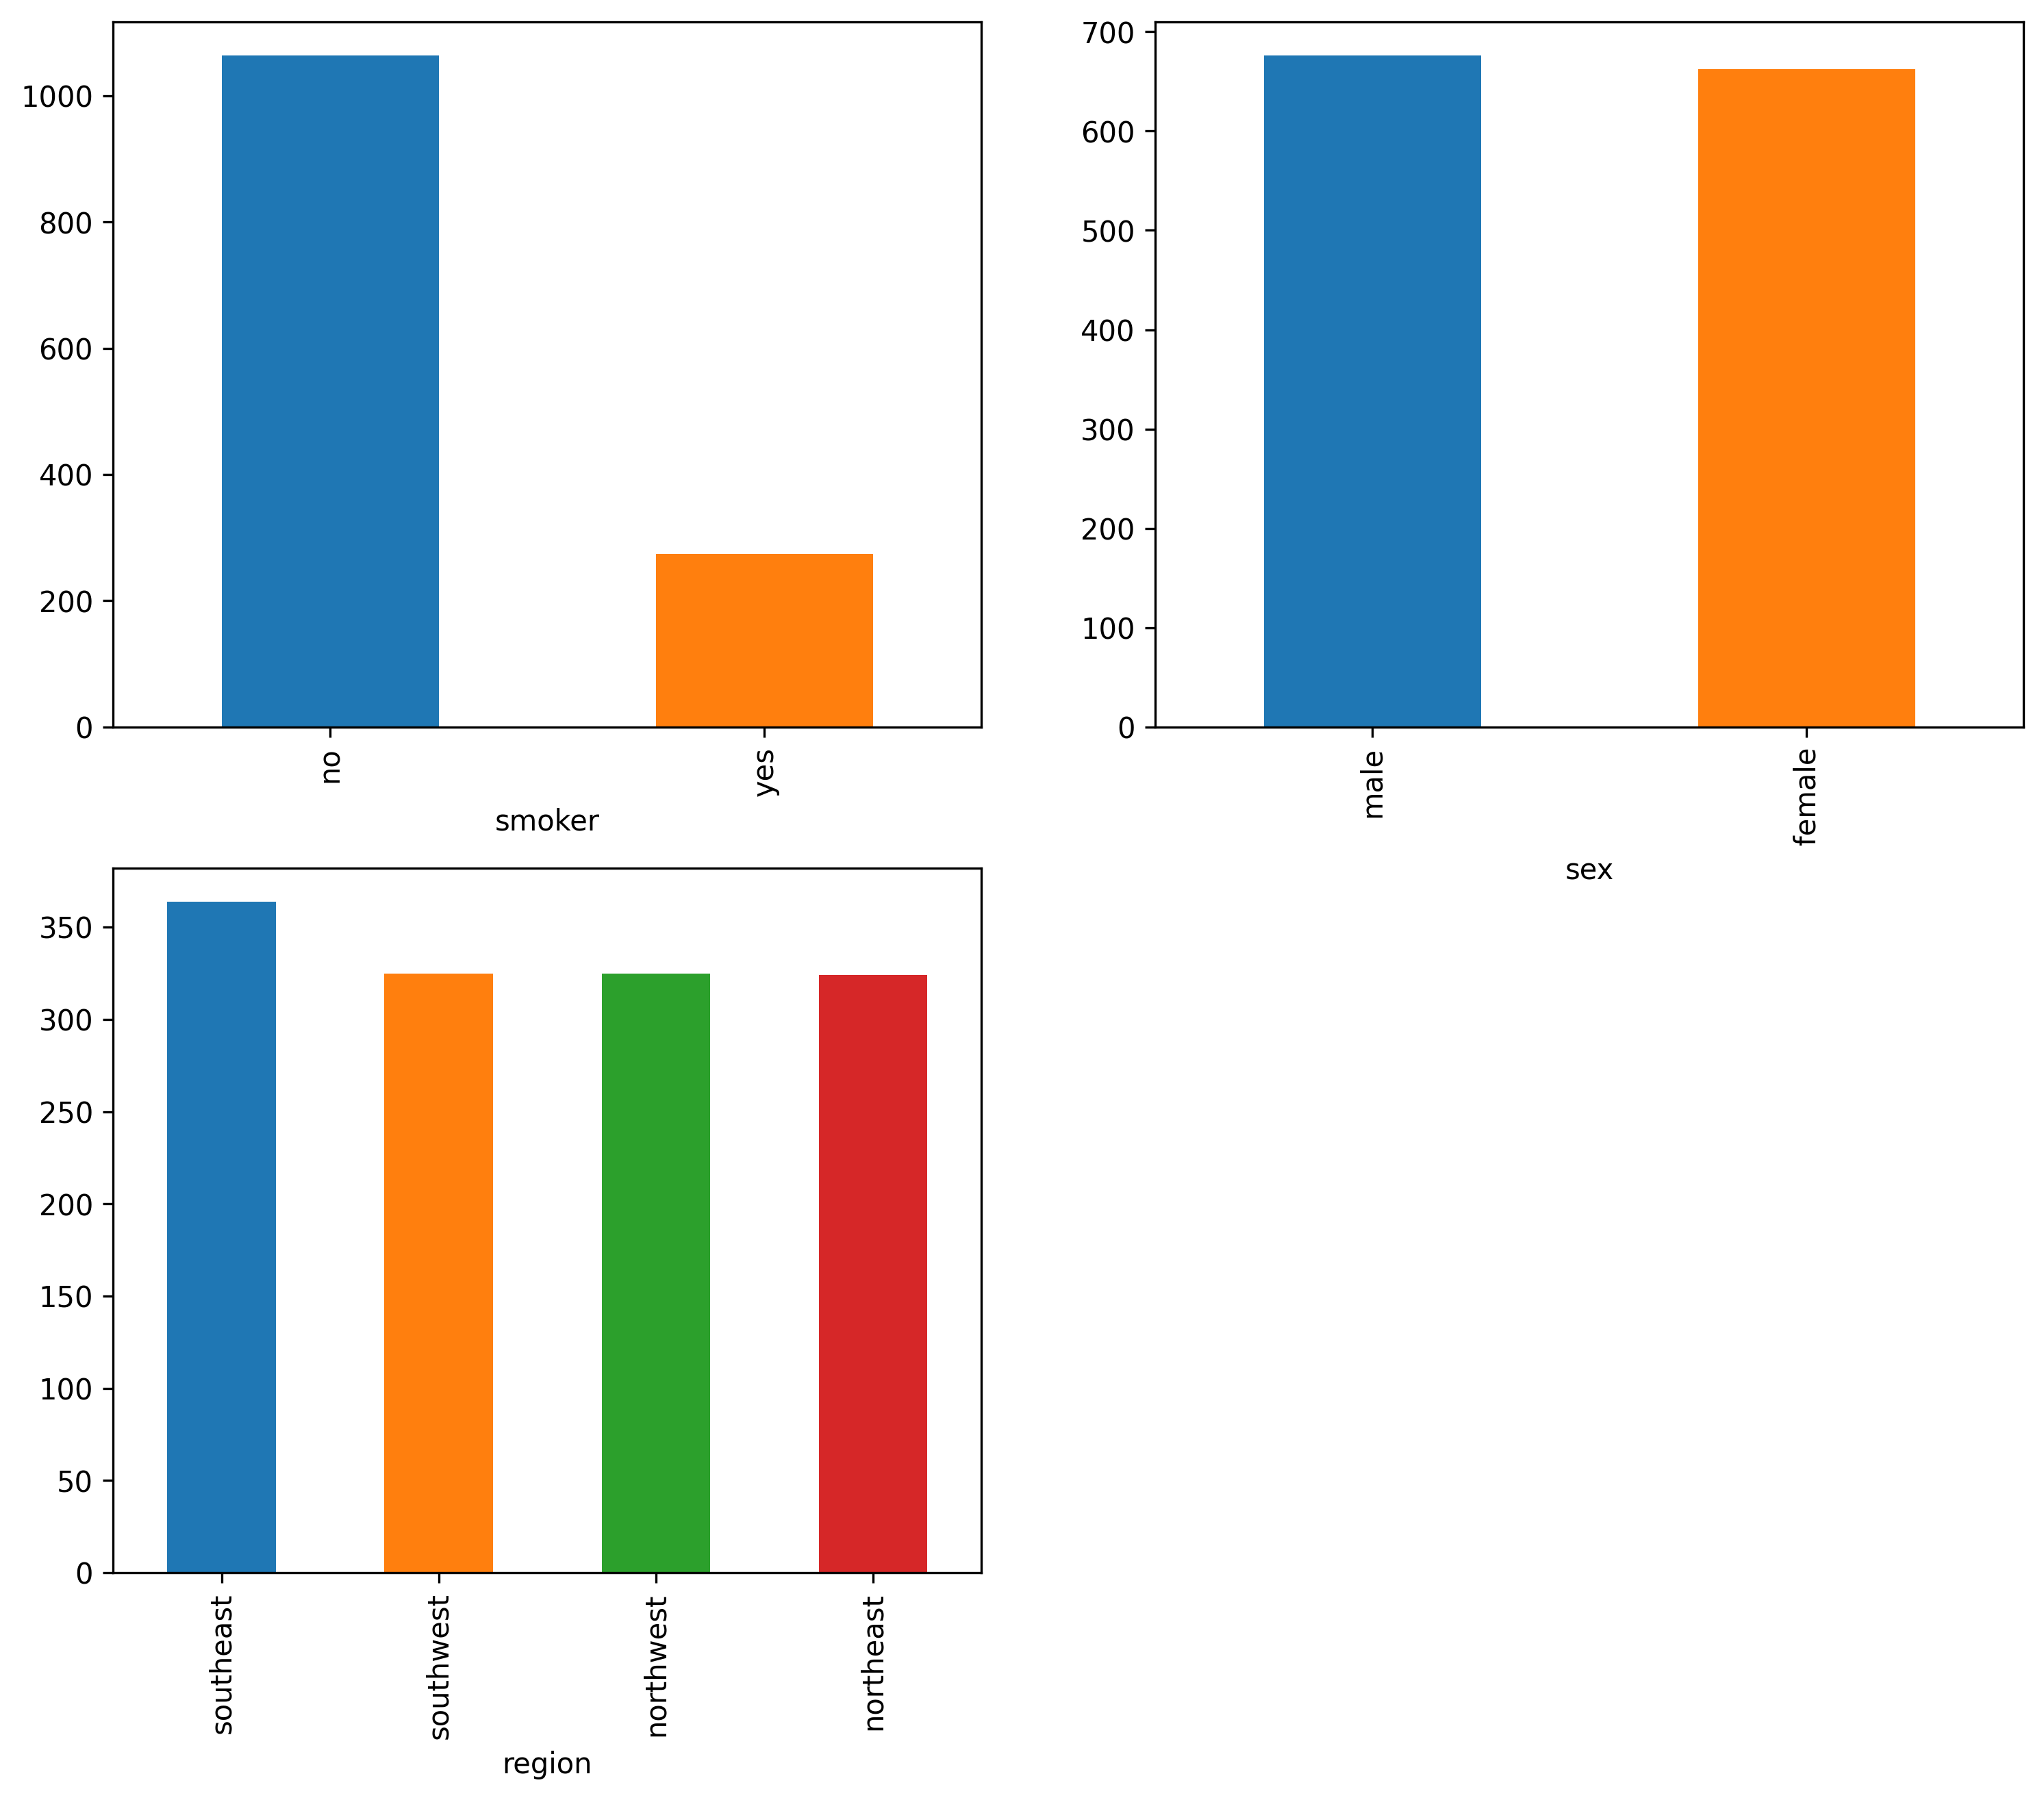

In [5]:
categorical = ['smoker', 'sex', 'region']
color = ['C0', 'C1', 'C2', 'C3']

fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)



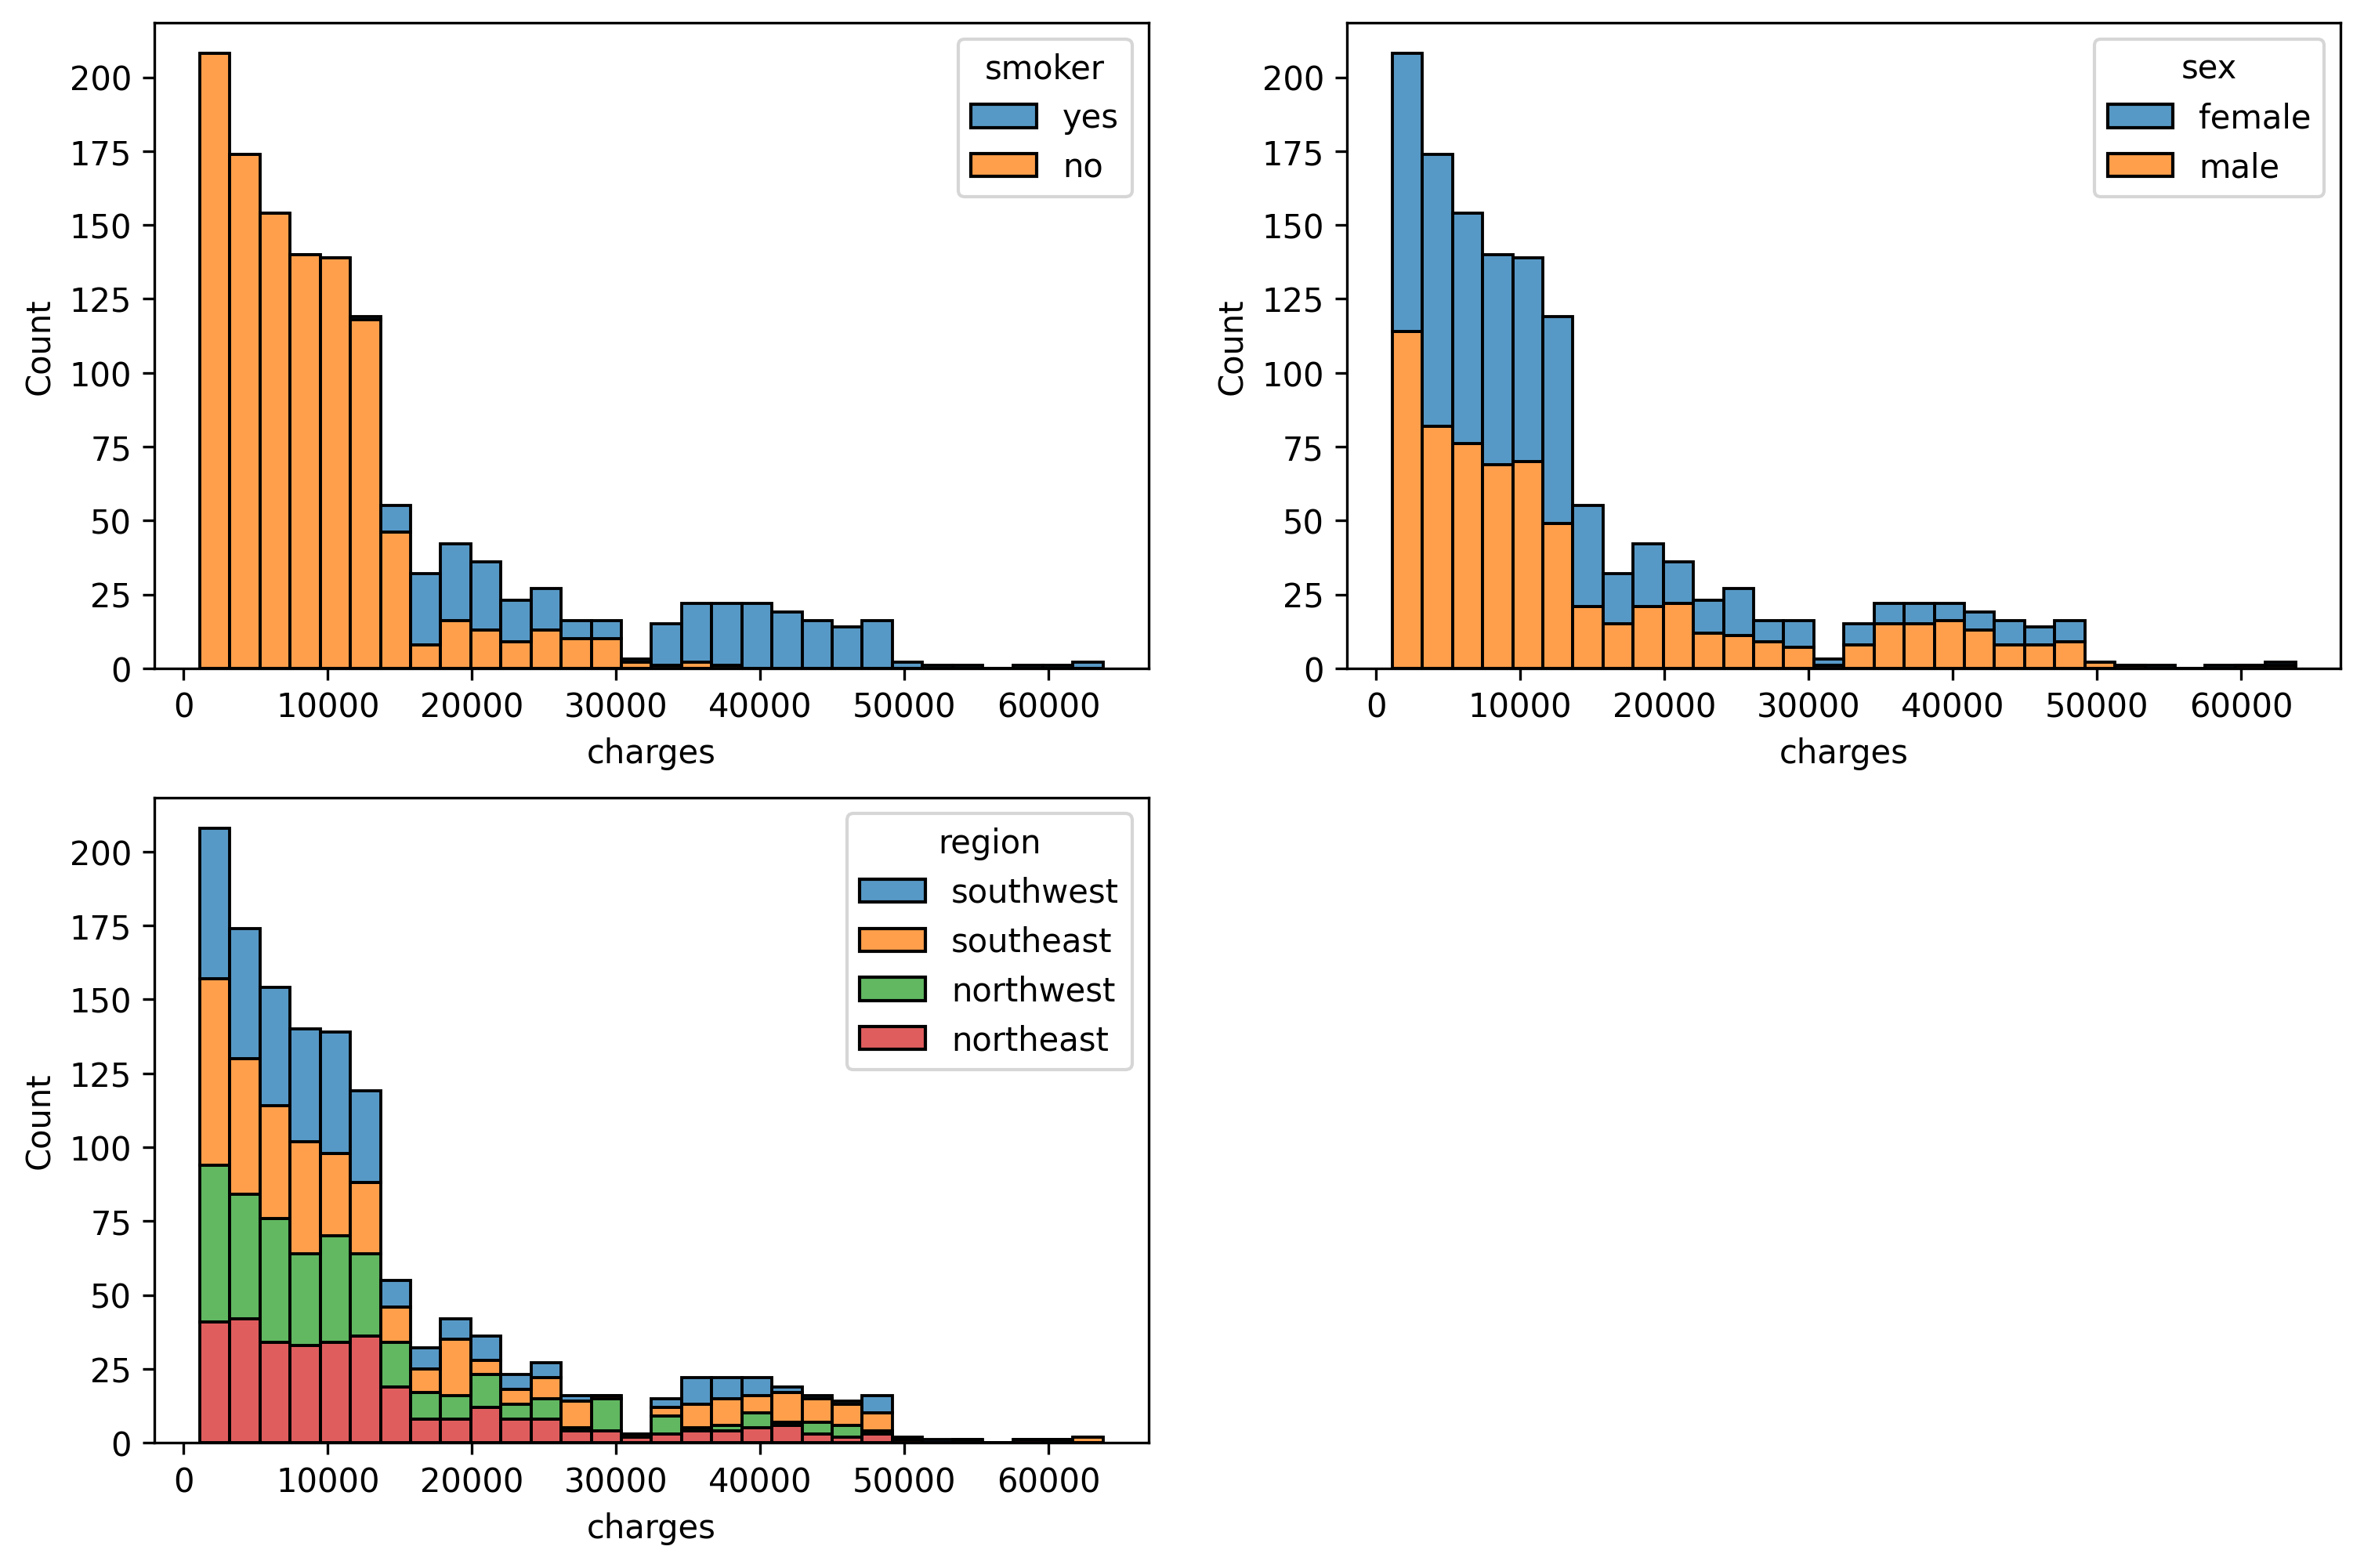

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col, multiple='stack', ax=ax)

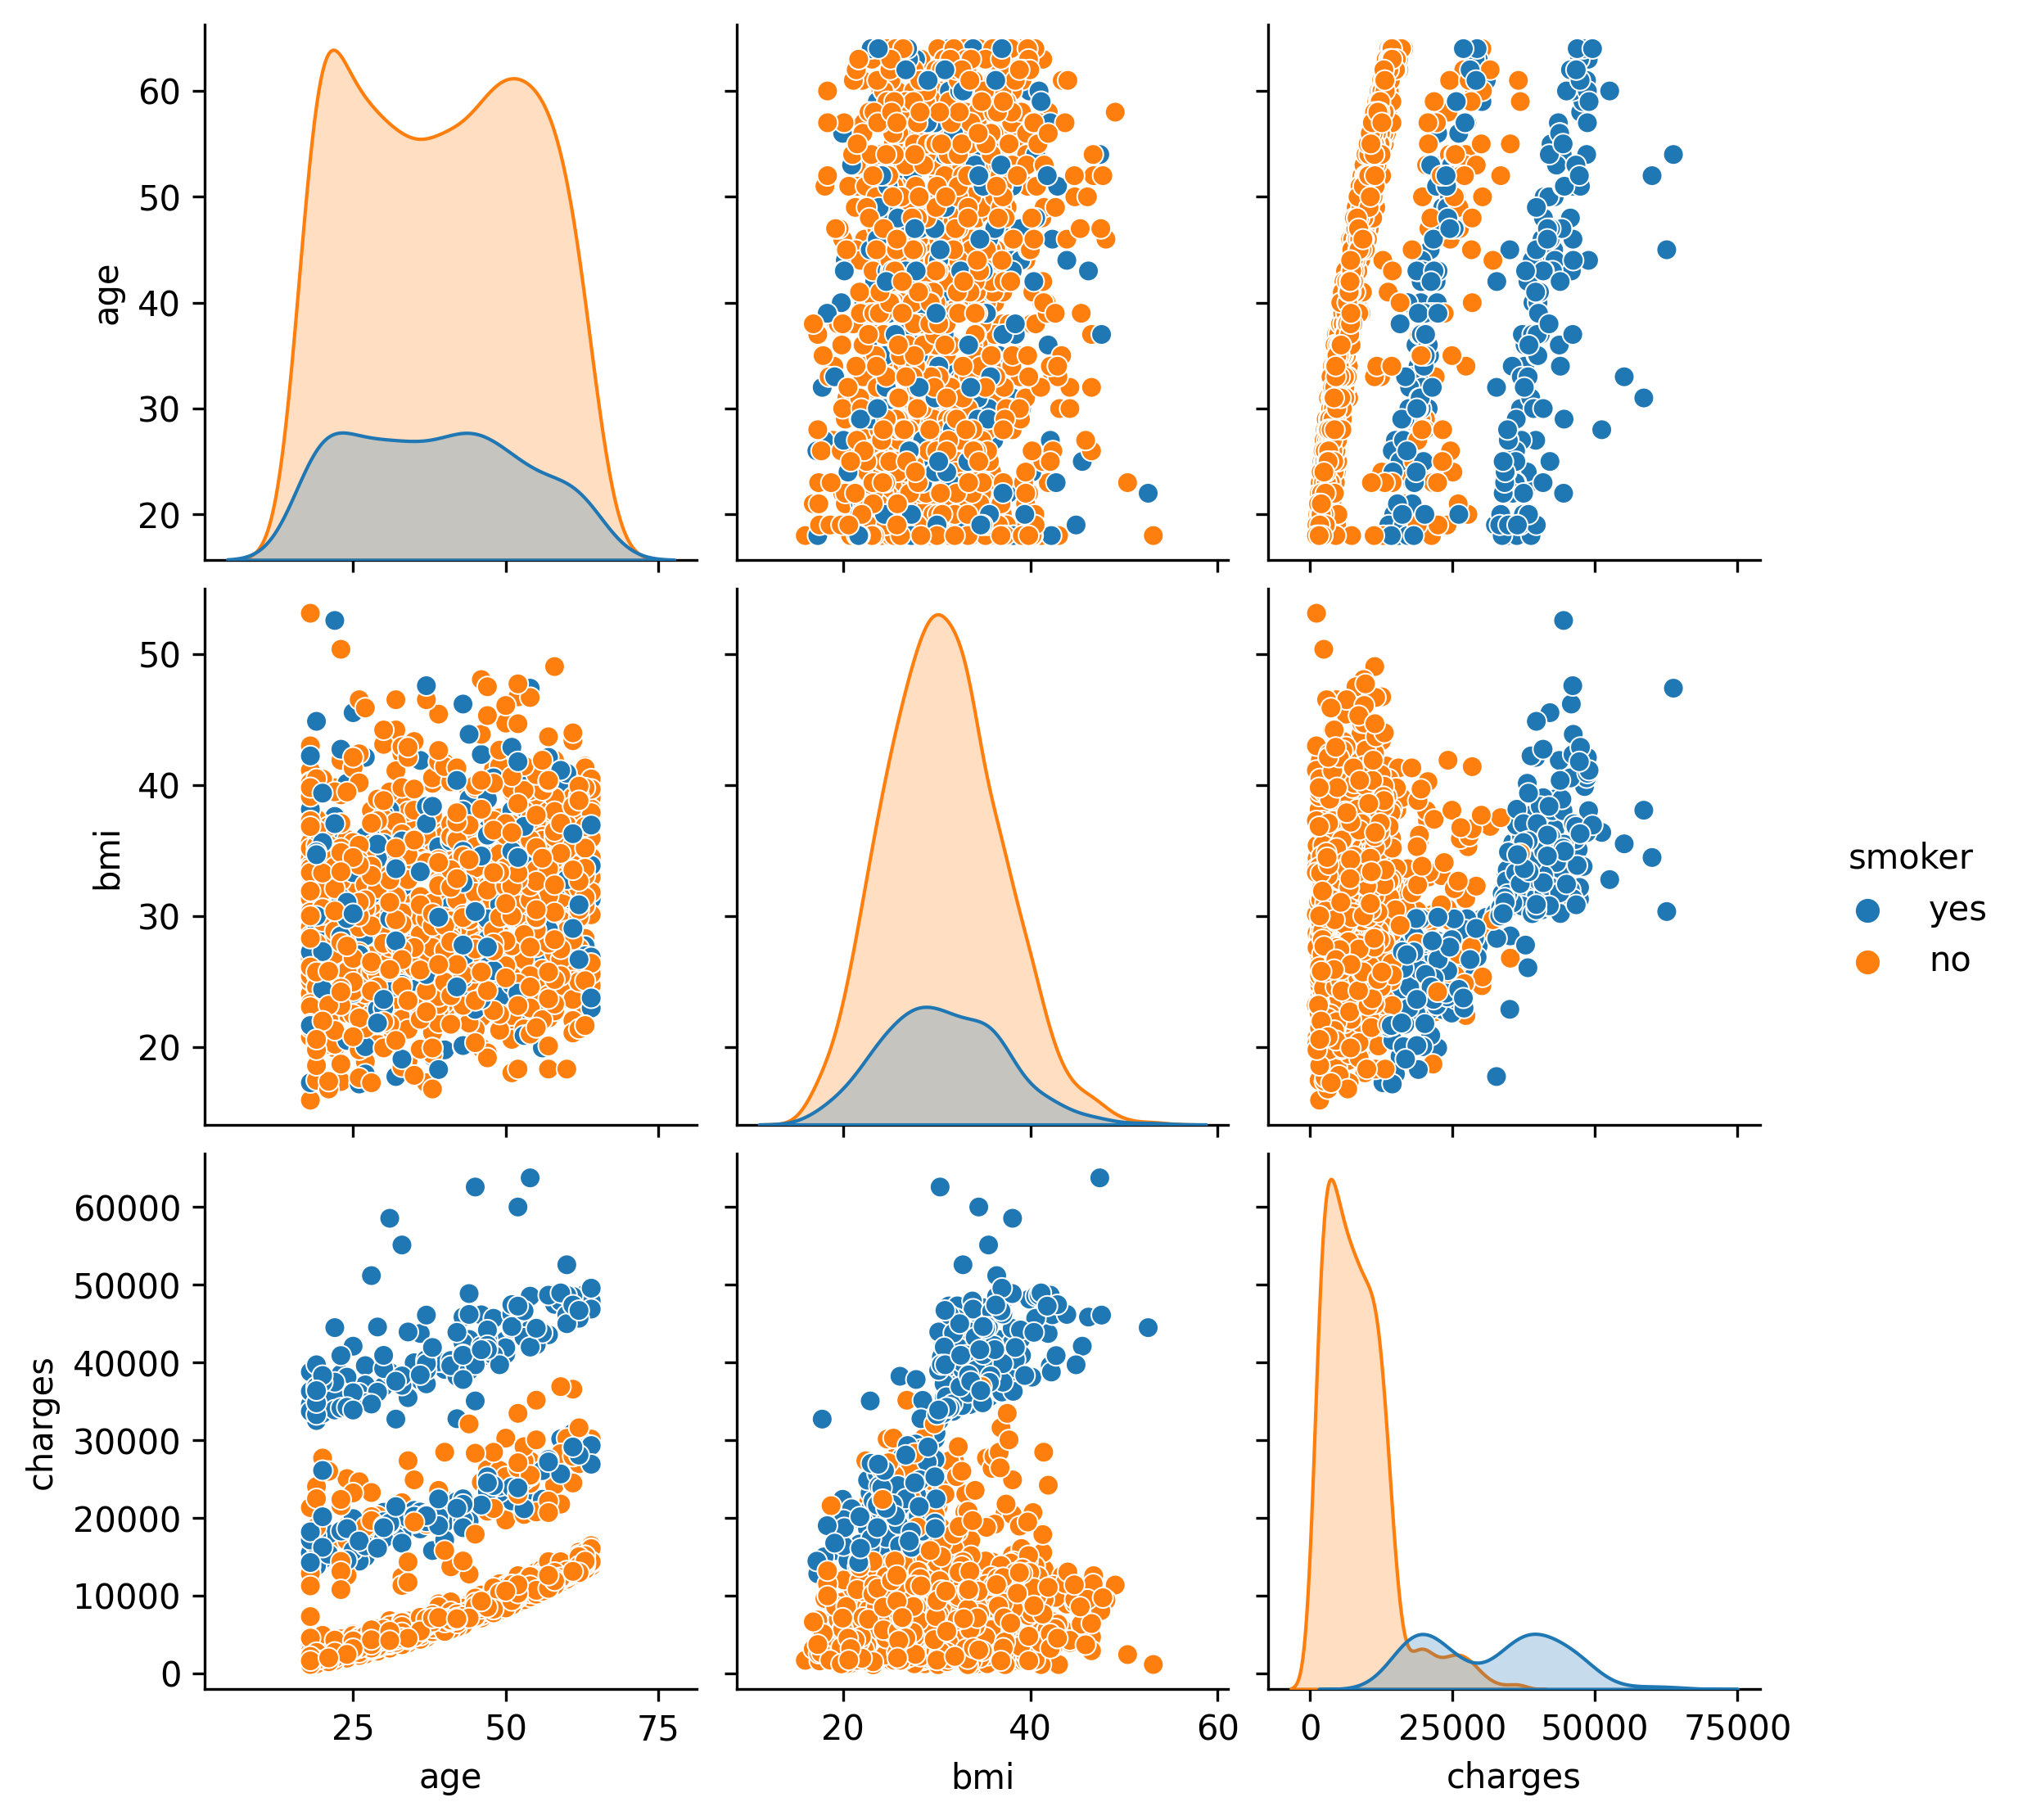

In [7]:
cols = ['age', 'bmi', 'charges', 'smoker']

sns.pairplot(data[cols], hue='smoker')
plt.show()

### Initializing the PyCaret Environment

In [8]:
reg = setup(data=data, target='charges', train_size = 0.8, session_id = 7402,
            numeric_features = numeric[:-1], categorical_features = categorical,
            transformation = True, normalize = True, transform_target = True)

,Description,Value
0,session_id,7402
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 9)"


In [9]:
get_config('X').head()

,age,bmi,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.462763,-0.408971,-1.053884,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.535749,0.543953,0.203960,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.807782,0.426243,1.414612,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.445654,-1.350171,-1.053884,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.517962,-0.240519,-1.053884,0.0,1.0,0.0,1.0,0.0,0.0


### Comparing Regression Models

In [10]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2275.4641,22815428.3119,4750.1089,0.8350,0.3858,0.1874,0.0160
rf,Random Forest Regressor,2342.1429,22959433.7357,4762.0337,0.8351,0.4097,0.2091,0.0850
ada,AdaBoost Regressor,3257.2171,23279230.3521,4807.0257,0.8339,0.4770,0.4264,0.0090
lightgbm,Light Gradient Boosting Machine,2491.6919,24030584.9610,4865.2118,0.8272,0.4153,0.2118,0.0300
catboost,CatBoost Regressor,2485.6847,25075332.3085,4978.9614,0.8189,0.4071,0.1994,0.3470
et,Extra Trees Regressor,2364.4206,25237906.1980,4999.4284,0.8167,0.4283,0.2116,0.0680
xgboost,Extreme Gradient Boosting,2931.6919,31946244.2000,5615.7612,0.7678,0.4551,0.2602,0.1140
dt,Decision Tree Regressor,3031.4152,42283353.7664,6468.0098,0.6936,0.5132,0.3181,0.0070
omp,Orthogonal Matching Pursuit,5645.3006,59119658.9118,7679.3608,0.5758,0.6831,0.6880,0.0060
ridge,Ridge Regression,4066.3602,61583198.0000,7714.4266,0.5583,0.4400,0.2707,0.0070


### Creating the Model

In [11]:
model = create_model('gbr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2324.8131,24607040.5795,4960.5484,0.8393,0.3810,0.1751
1,2571.2202,29114809.8137,5395.8141,0.7413,0.4376,0.2551
2,2483.0865,21498482.3051,4636.6456,0.8585,0.4261,0.2000
3,2545.2911,25489822.2086,5048.7446,0.8158,0.3937,0.1765
4,2218.7259,19926308.9440,4463.8894,0.8240,0.4237,0.2161
5,1991.9530,17546103.1066,4188.8069,0.9050,0.2883,0.1446
6,2557.6356,30138770.5115,5489.8789,0.8316,0.4120,0.1911
7,1904.3245,16102540.3261,4012.7971,0.8950,0.3101,0.1860
8,1789.5416,17459155.1593,4178.4154,0.8269,0.3299,0.1574
9,2368.0500,26271250.1647,5125.5488,0.8125,0.4560,0.1721


### Tuning the Model

In [67]:
params = {
        'learning_rate': [0.01, 0.02, 0.05],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
        'n_estimators' : [100, 200, 300, 400, 500, 600]
    }

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
                       custom_grid = params, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2221.3251,23485165.0834,4846.1495,0.8466,0.3680,0.1698
1,2413.4985,28417256.3250,5330.7838,0.7475,0.4269,0.2226
2,2358.1966,20434514.3855,4520.4551,0.8655,0.4078,0.1862
3,2224.8093,22543132.0952,4747.9608,0.8371,0.3895,0.1590
4,1954.8899,17295001.5227,4158.7259,0.8472,0.4099,0.1875
5,1866.4875,16659066.2449,4081.5519,0.9098,0.2809,0.1412
6,2486.6686,29110527.1669,5395.4172,0.8374,0.4152,0.1857
7,1862.5828,15867899.1150,3983.4532,0.8966,0.2974,0.1748
8,1746.2978,16452845.2892,4056.2107,0.8368,0.3261,0.1598
9,2372.9397,26292453.2888,5127.6167,0.8124,0.4505,0.1706


### Making Predictions

In [72]:
cols = ['age', 'bmi', 'children', 'sex_female', 'smoker_no','charges','Label']

predictions = predict_model(tuned_model)
predictions[cols].head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1937.1153,16816546.1060,4100.7982,0.8921,0.3297,0.1730


,age,bmi,children,sex_female,smoker_no,charges,Label
0,0.558673,-2.023842,0.203960,0.0,1.0,8627.541016,9174.750784
1,-0.880372,-0.739121,-1.053884,0.0,1.0,3070.808594,3816.227189
2,1.055905,-0.017651,-1.053884,0.0,1.0,10231.500000,12099.833376
3,1.197541,0.522682,-1.053884,0.0,0.0,43921.183594,43471.562081
4,0.273279,-0.619599,0.934173,1.0,0.0,22478.599609,23532.006358


### Plotting the Model

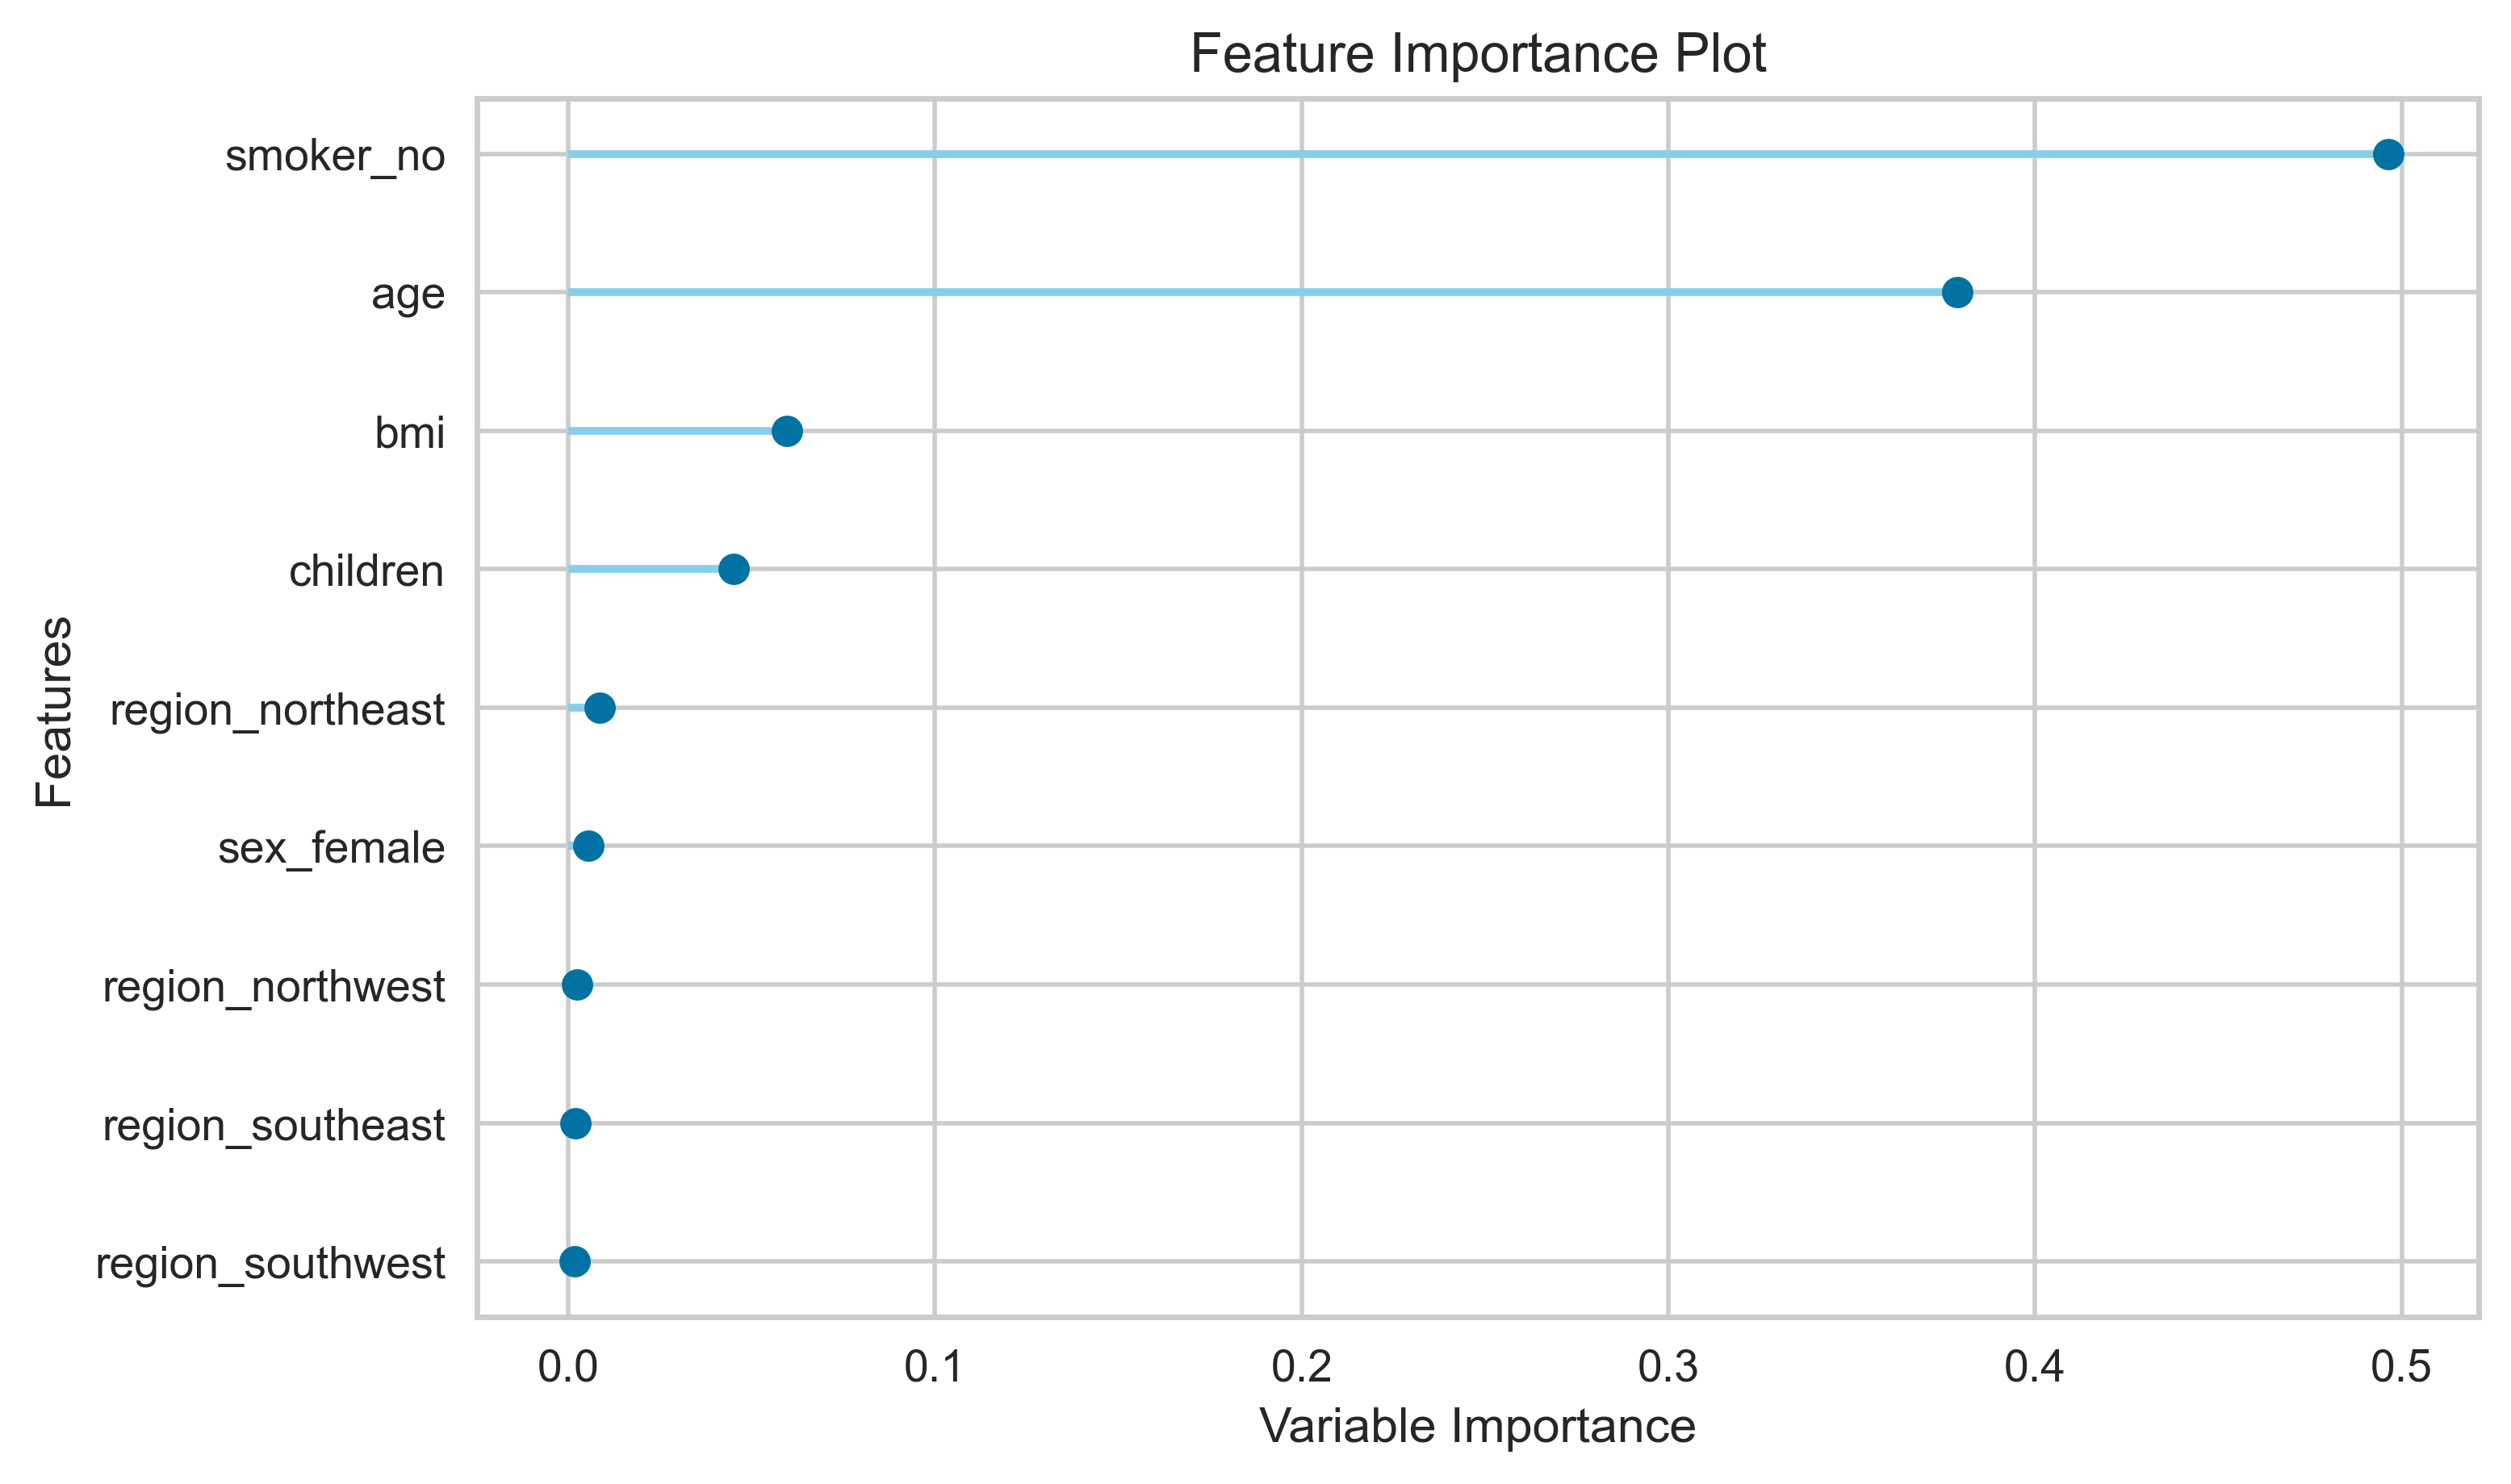

In [69]:
plot_model(tuned_model, 'feature', scale = 4)

### Finalizing and Saving the Model

In [70]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['smoker', 'sex',
                                                             'region'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['age', 'bmi',
                                                           'children'],
                                       target='charges', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=No...
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                 